In [1]:
!wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip
!wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_LR_bicubic_X4.zip
!unzip -q DIV2K_train_HR.zip
!unzip -q DIV2K_train_LR_bicubic_X4.zip

--2020-02-12 20:14:26--  http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.162
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.162|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip [following]
--2020-02-12 20:14:27--  https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3530603713 (3.3G) [application/zip]
Saving to: ‘DIV2K_train_HR.zip’

DIV2K_train_HR.zip  100%[===================>]   3.29G  18.5MB/s    in 3m 3s   

2020-02-12 20:17:30 (18.4 MB/s) - ‘DIV2K_train_HR.zip’ saved [3530603713/3530603713]

--2020-02-12 20:17:32--  http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_LR_bicubic_X4.zip
Resolving data.vision.ee.ethz.ch (data.vision.

In [1]:
%tensorflow_version 2.x
import os, random
from glob import glob
from tqdm import tqdm
from PIL import Image
import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
hr_images_path = './DIV2K_train_HR'
lr_images_path = './DIV2K_train_LR_bicubic/X4'
output_path = 'div2d_4x_bicubic.tfrecord'

In [0]:
def _byte_feature(val):
    val = val.numpy() if isinstance(val, type(tf.constant(0))) else val
    return tf.train.Feature(
        bytes_list=tf.train.BytesList(
            value=[val]
        )
    )

In [0]:
def _float_feature(val):
    return tf.train.Feature(
        float_list=tf.train.FloatList(
            value=[val]
        )
    )

In [0]:
def _int64_feature(val):
    return tf.train.Feature(
        int64_list=tf.train.Int64List(
            value=[val]
        )
    )

In [0]:
def make_binary_example(image_name, hr_img_str, lr_img_str):
    feature = {
        'image/img_name': _byte_feature(image_name),
        'image/hr_image': _byte_feature(hr_img_str),
        'image/lr_image': _byte_feature(lr_img_str)
    }
    return tf.train.Example(
        features=tf.train.Features(
            feature=feature
        )
    )

In [0]:
samples = []
for hr_img_path in glob(hr_images_path + '/*.png'):
    image_name = os.path.basename(hr_img_path).replace('.png', '')
    lr_img_path = os.path.join(lr_images_path, image_name + 'x4.png')
    samples.append((
        image_name,
        hr_img_path,
        lr_img_path
    ))
random.shuffle(samples)

In [8]:
samples[0]

('0089', './DIV2K_train_HR/0089.png', './DIV2K_train_LR_bicubic/X4/0089x4.png')

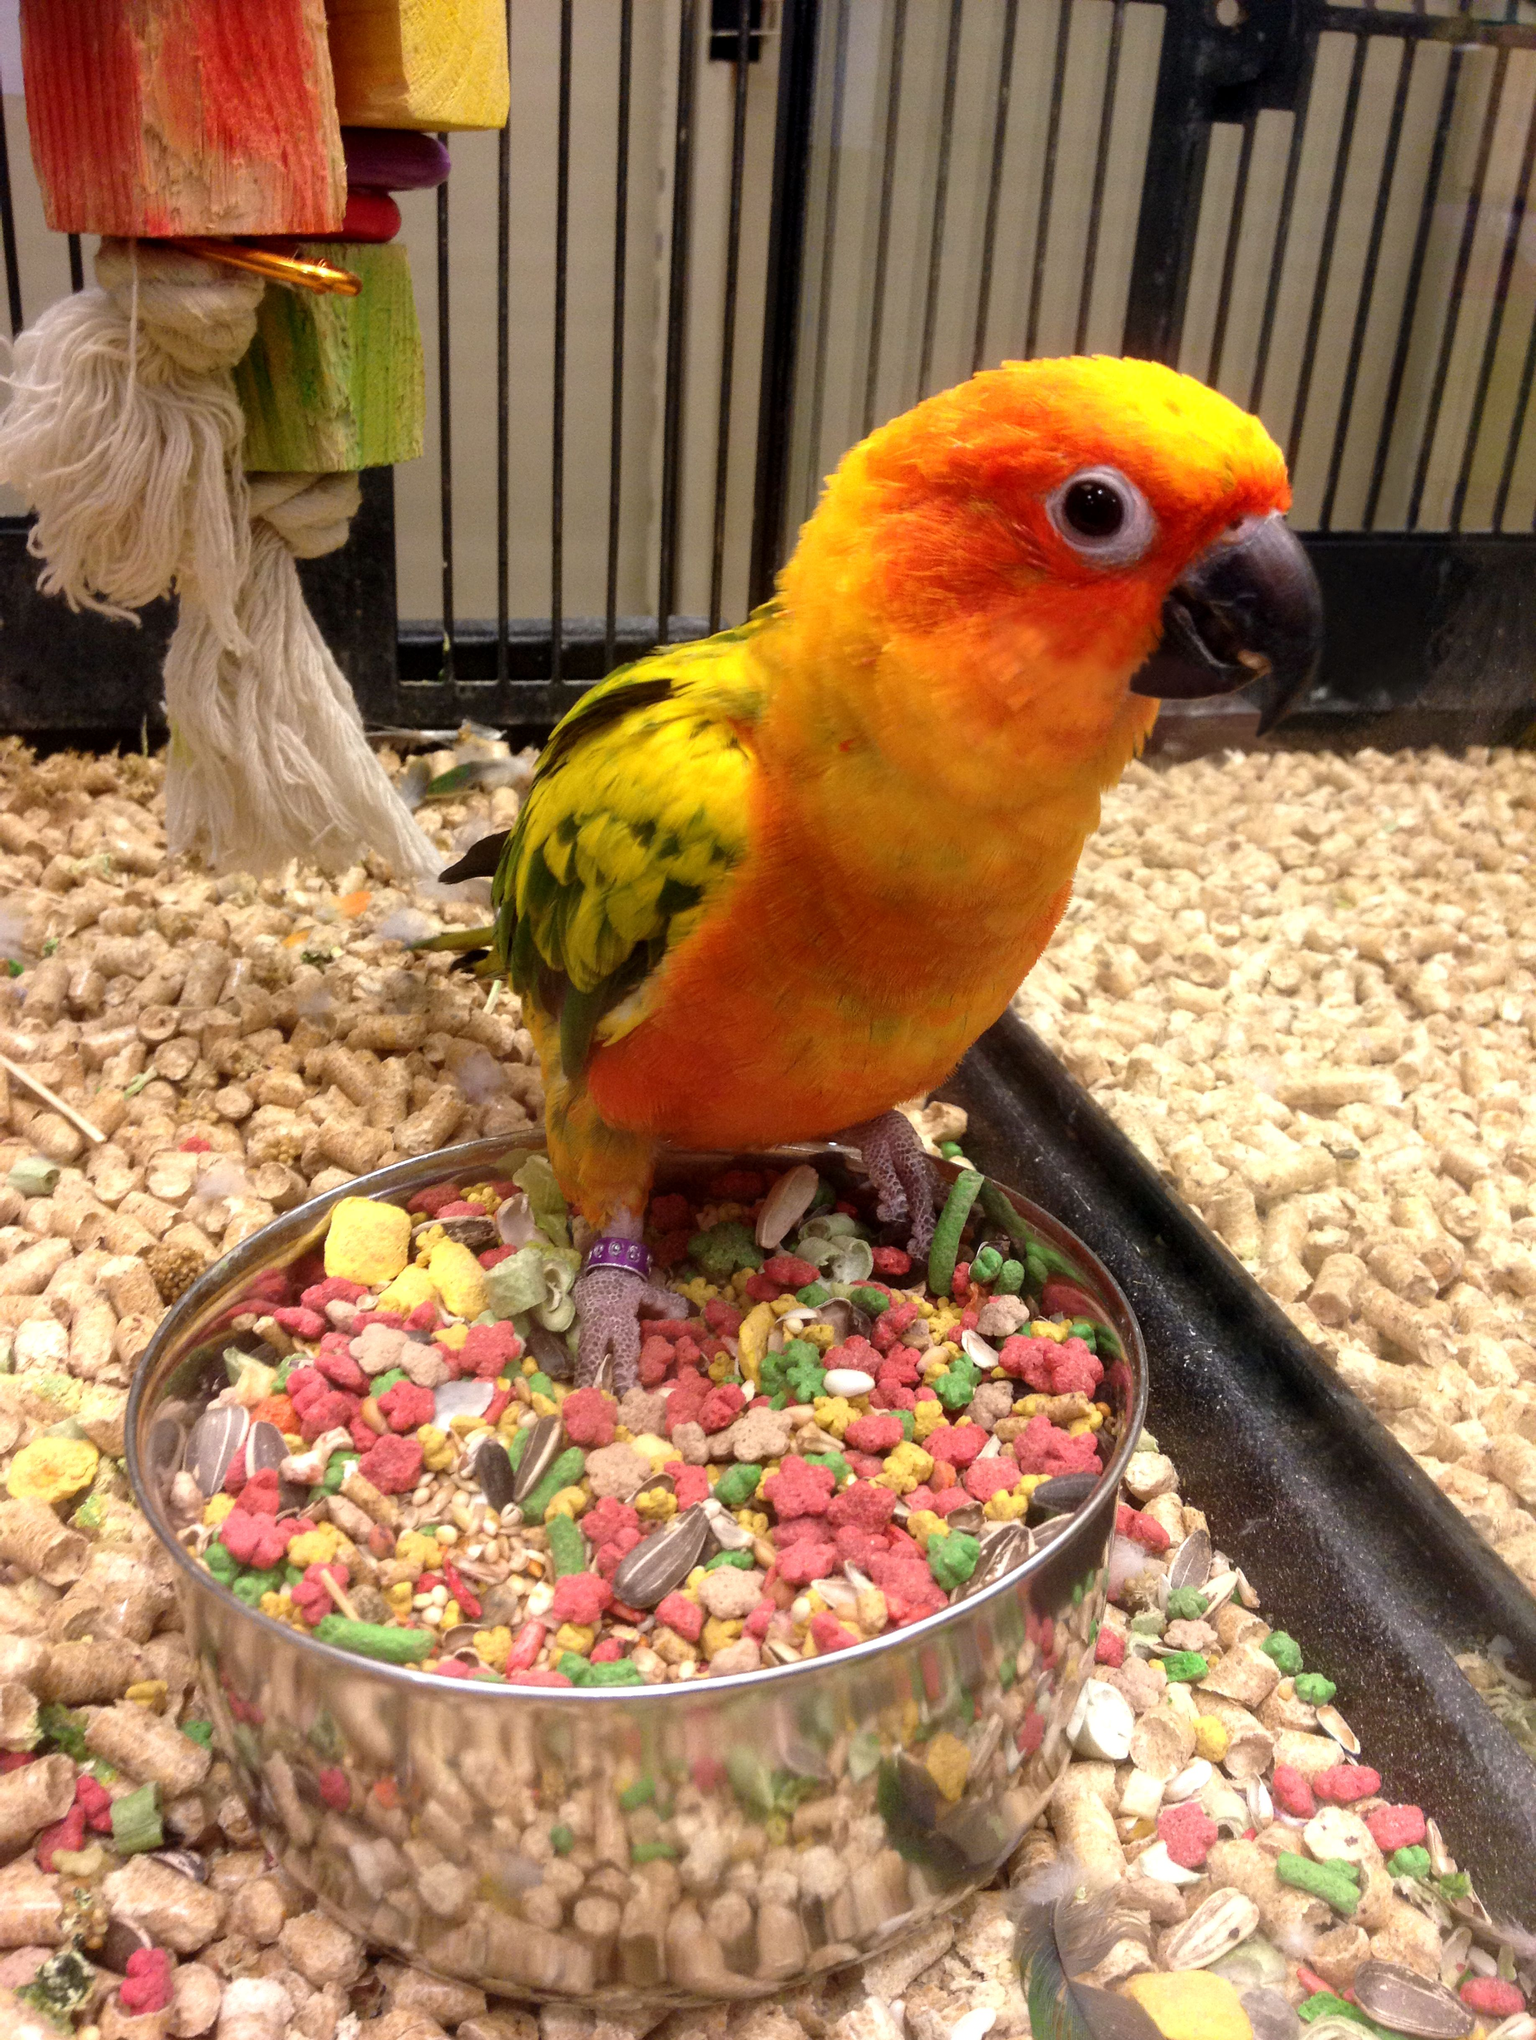

In [9]:
Image.open(samples[0][1])

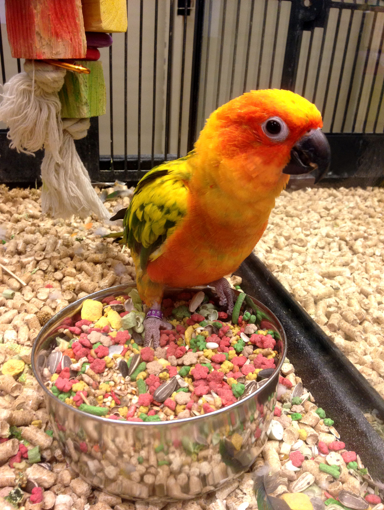

In [10]:
Image.open(samples[0][2])

In [11]:
with tf.io.TFRecordWriter(output_path) as writer:
    for img_name, hr_img_path, lr_img_path in tqdm(samples):
        hr_img_str = open(hr_img_path, 'rb').read()
        lr_img_str = open(lr_img_path, 'rb').read()
        tf_example = make_binary_example(str.encode(img_name), hr_img_str, lr_img_str)
        writer.write(tf_example.SerializeToString())

100%|██████████| 800/800 [00:44<00:00, 17.88it/s]
